In [1]:
import pandas as pd
import numpy as np

## Interactions

In [2]:
column_names = ["user", "item", "rating", "timestamp"]  
interactions = pd.read_csv('../data/raw/ml-100k/ml-100k/u.data', sep='\t', names=column_names)

In [3]:
interactions.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
interactions.isna().sum()

user         0
item         0
rating       0
timestamp    0
dtype: int64

<Axes: >

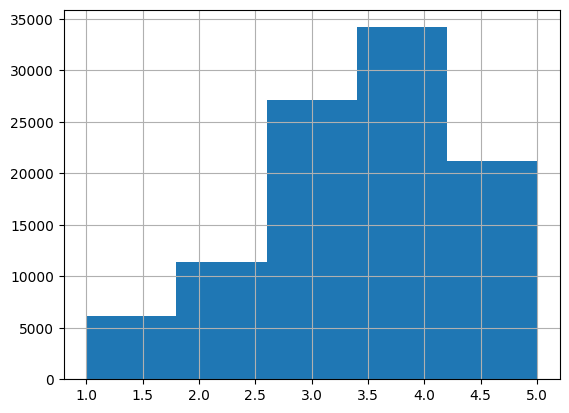

In [5]:
interactions.rating.hist(bins=5)

Let's take only interactions with rating $\geq$ 3 to recommend only good films

In [6]:
interactions = interactions.query('rating >= 3')

## Items

In [7]:
column_names = ["movieId", "movieTitle", "releaseDate", "URL"] + [f'genre{i}' for i in range(1, 20)]  
items = pd.read_csv('../data/raw/ml-100k/ml-100k/u.item', sep='|', names=column_names)

In [8]:
items[items.isna().any(axis=1)]

,movieId,movieTitle,releaseDate,URL,genre1,genre2,genre3,genre4,genre5,genre6,...,genre10,genre11,genre12,genre13,genre14,genre15,genre16,genre17,genre18,genre19
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1357,1358,The Deadly Cure (1996),16-Sep-1996,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1358,1359,Boys in Venice (1996),24-Sep-1996,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In the dataset we have one raw without any information about film, lets remove it.

In [9]:
items = items.query('movieId != 267')
items.index = np.arange(0, len(items))
interactions = interactions.query('item != 267')

items.to_csv('../data/interim/u.item')
interactions.to_csv('../data/interim/u.data')

## Users

In [10]:
column_names = ["userId", "age", "gender", "occupation", "zipcode"]
users = pd.read_csv('../data/raw/ml-100k/ml-100k/u.user', sep='|', names=column_names)

In [11]:
users.head()

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
users.age.describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [13]:
users.gender.value_counts()

gender
M    670
F    273
Name: count, dtype: int64

No outliers in the dataset

In [14]:
users.to_csv('../data/interim/u.user')